In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("nhanes_2015_2016.csv")
print(df.shape)


(5735, 28)


In [4]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [5]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [6]:
df.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [7]:
df.DMDEDUC2.value_counts().sum()

5474

In [8]:
pd.isnull(df.DMDEDUC2).sum()

261

In some cases it is useful to [replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html) integer codes with a text label that reflects the code's meaning.  Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

In [9]:
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2:"9-11",3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

doing the same for the gender variable (replacing the integers with text)

In [10]:
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

Show the proportion of responders in each education level 

In [11]:
x = df.DMDEDUC2x.value_counts()
x/x.sum()

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

### So, ~12% of survey responders have completed less than 9 years of education

In some cases we will want to treat the missing response category as another category of observed response, rather than ignoring it when creating summaries.  Below we create a new category called "Missing", and assign all missing values to it usig [fillna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna).  Then we recalculate the frequency distribution.  We see that 4.6% of the responses are missing.

In [12]:
df.DMDEDUC2x = df.DMDEDUC2x.fillna("Missing")
x = df.DMDEDUC2x.value_counts()
x/x.sum()

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

In [13]:
df["BMXWT"].dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [14]:
df["BMXWT"].describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [15]:
df.ALQ110.describe()

count    1731.000000
mean        1.587522
std         0.623940
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: ALQ110, dtype: float64

In [16]:
df.ALQ110.dropna().describe()

count    1731.000000
mean        1.587522
std         0.623940
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: ALQ110, dtype: float64

In [17]:
x = df["BMXWT"].dropna()
print(np.mean(x))

81.34267560889509


In [18]:
print(x.mean())

81.34267560889509


In [19]:
print(np.percentile(x,50))

78.2


Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension.

In [20]:
np.mean((df["BPXSY1"] >= 120) & (df["BPXSY1"] <= 139))

0.366870095902354

Likewise,Considering only the diastolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension.

In [21]:
np.mean((df["BPXDI1"] >= 80) & (df["BPXDI1"]<= 89))

0.14699215344376634

Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure.  Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.  The combined systolic and diastolic condition for pre-hypertension is somewhat complex, so below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [22]:
a = (df["BPXSY1"] >= 120) & (df["BPXSY1"] <= 139)
b = (df["BPXDI1"] >= 80) & (df["BPXDI1"]<= 89)
np.mean(a|b)

0.43173496076721884

Blood pressure measurements are affected by a phenomenon called "white coat hypertension", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers.  Typically this effect subsides if the blood pressure is measured several times in sequence.  In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2) is the second measurement of systolic blood pressure).  We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [23]:
print(np.mean(df["BPXSY1"] - df["BPXSY2"]))
print(np.mean(df["BPXDI1"] - df["BPXDI2"]))

0.6749860309182343
0.3490407897187558


These mean differences are positive -- the first systolic blood pressure measurement is around 0.67 mm Hg greater than the second systolic blood pressure measurement, and the first diastolic blood pressure measurement is around 0.35 mm Hg greater than the second diastolic blood pressure measurement.  This is consistent with the presence of "white coat hypertension".

/Users/farhin/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


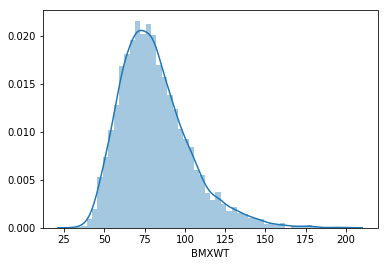

In [24]:
sns.distplot(df.BMXWT.dropna())

To compare several distributions, we can use side-by-side boxplots.  Below we compare the distributions of the first and second systolic blood pressure measurements ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1), BPXSY2), and the first and second diastolic blood pressure measurements ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1), BPXDI2). As expected, diastolic measurements are substantially lower than systolic measurements.  Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement.  This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below.

Text(0, 0.5, 'Blood pressure in mm/Hg')

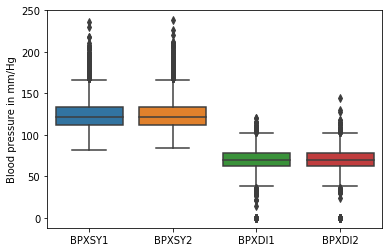

In [25]:
sns.boxplot(data = df.loc[:,["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]]).set_ylabel("Blood pressure in mm/Hg")

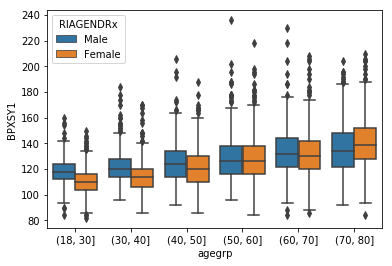

In [26]:
df["agegrp"] = pd.cut(df.RIDAGEYR,[18, 30, 40, 50, 60, 70, 80])
sns.boxplot(x = "agegrp", y = "BPXSY1", hue = "RIAGENDRx", data = df)

In [27]:
df.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

In [28]:
dx = df.loc[~df.DMDEDUC2x.isin(["Don't know", "Missing"]),:]
dx = dx.groupby(["agegrp","RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack()
dx= dx.apply(lambda x: x/sum(x), axis = 1)
dx

DMDEDUC2x               9-11        <9   College    HS/GED  Some college/AA
agegrp   RIAGENDRx                                                         
(18, 30] Female     0.079566  0.048825  0.282098  0.215190         0.374322
         Male       0.116525  0.042373  0.258475  0.250000         0.332627
(30, 40] Female     0.088608  0.097046  0.314346  0.164557         0.335443
         Male       0.150655  0.102620  0.251092  0.227074         0.268559
(40, 50] Female     0.109562  0.105578  0.298805  0.173307         0.312749
         Male       0.142145  0.112219  0.274314  0.209476         0.261845
(50, 60] Female     0.117021  0.102128  0.244681  0.234043         0.302128
         Male       0.147577  0.123348  0.231278  0.242291         0.255507
(60, 70] Female     0.117914  0.188209  0.195011  0.206349         0.292517
         Male       0.135011  0.151030  0.233410  0.231121         0.249428
(70, 80] Female     0.105134  0.224939  0.149144  0.239609         0.281174
         Male       0.112500  0.180000  0.237500  0.215000         0.255000

In [29]:
df["DMDMARTLx"] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "NeverMarried", 6: "Cohabitating", 77: "Refused", 99: "Unknown"})
print("all subjects")

x = df["DMDMARTLx"].value_counts()
x = x/x.sum()
print(x)



all subjects
Married         0.507855
NeverMarried    0.183412
Divorced        0.105773
Cohabitating    0.096273
Widowed         0.072342
Separated       0.033979
Refused         0.000365
Name: DMDMARTLx, dtype: float64


In [30]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDEDUC2x,RIAGENDRx,agegrp,DMDMARTLx
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,27.8,43.3,43.6,35.9,101.1,2.0,College,Male,"(60, 70]",Married
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,30.8,38.0,40.0,33.2,107.9,NaN,HS/GED,Male,"(50, 60]",Divorced
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,28.8,35.6,37.0,31.0,116.5,2.0,HS/GED,Male,"(70, 80]",Married
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,42.4,38.5,37.7,38.3,110.1,2.0,College,Female,"(50, 60]",Cohabitating
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,20.3,37.4,36.0,27.2,80.4,2.0,Some college/AA,Female,"(40, 50]",Divorced


In [31]:
x = df.groupby("RIAGENDRx")["DMDMARTLx"].value_counts()
#x = x/x.sum()
print(x)

RIAGENDRx  DMDMARTLx   
Female     Married         1303
           NeverMarried     520
           Divorced         350
           Widowed          296
           Cohabitating     262
           Separated        118
           Refused            1
Male       Married         1477
           NeverMarried     484
           Cohabitating     265
           Divorced         229
           Widowed          100
           Separated         68
           Refused            1
Name: DMDMARTLx, dtype: int64


In [32]:
print(df.groupby("RIAGENDRx"))

In [33]:
for ky,db in df.groupby("RIAGENDRx"):
    print("\nGENDER = ", ky)
    x = db["DMDMARTLx"].value_counts()
    print(x/x.sum())


GENDER =  Female
Married         0.457193
NeverMarried    0.182456
Divorced        0.122807
Widowed         0.103860
Cohabitating    0.091930
Separated       0.041404
Refused         0.000351
Name: DMDMARTLx, dtype: float64

GENDER =  Male
Married         0.562881
NeverMarried    0.184451
Cohabitating    0.100991
Divorced        0.087271
Widowed         0.038110
Separated       0.025915
Refused         0.000381
Name: DMDMARTLx, dtype: float64


In [34]:
df3040 = df.query('RIDAGEYR >= 30 & RIDAGEYR<= 40')
for ky,db in df3040.groupby("RIAGENDRx"):
    print("\nGender = ", ky, ", between 30 to 40 years age")
    x = db["DMDMARTLx"].value_counts()
    print(x/x.sum())


Gender =  Female , between 30 to 40 years age
Married         0.535714
NeverMarried    0.218045
Cohabitating    0.122180
Divorced        0.086466
Separated       0.033835
Widowed         0.003759
Name: DMDMARTLx, dtype: float64

Gender =  Male , between 30 to 40 years age
Married         0.556680
NeverMarried    0.204453
Cohabitating    0.157895
Divorced        0.048583
Separated       0.024291
Widowed         0.006073
Refused         0.002024
Name: DMDMARTLx, dtype: float64


In [35]:
df_female = df.query('RIAGENDRx == "Female"')
print(df_female)

#df["agegrp"] = pd.cut(df.RIDAGEYR,[18, 30, 40, 50, 60, 70, 80])

       SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
3     83735     2.0     1.0     1.0       2         2        56         3   
4     83736     2.0     1.0     1.0       2         2        42         4   
5     83737     2.0     2.0     NaN       2         2        72         1   
7     83742     1.0     NaN     1.0       2         2        32         1   
12    83752     1.0     NaN     2.0       1         2        30         2   
13    83754     2.0     1.0     1.0       2         2        67         2   
15    83757     1.0     NaN     1.0       2         2        57         2   
16    83759     2.0     2.0     NaN       2         2        19         1   
17    83761     1.0     NaN     1.0       2         2        24         5   
18    83762     NaN     NaN     NaN       1         2        27         4   
19    83767     2.0     2.0     NaN       2         2        54         5   
21    83773     2.0     2.0     NaN       2         2        80         3   

In [36]:
df.RIAGENDRx.value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

In [37]:
df_female.RIDAGEYR.describe()

count    2976.000000
mean       47.793011
std        18.299419
min        18.000000
25%        32.000000
50%        47.000000
75%        62.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [38]:
df_female["agegrp"] = pd.cut(df_female.RIDAGEYR,[18, 20,30, 40, 50, 60, 70, 80])
#df_female.agegrp.value_counts()

/Users/farhin/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
import math
dx = df_female.loc[~df_female.DMDMARTLx.isin(["Refused",np.nan]),:]
dx = dx.groupby("agegrp")["DMDMARTLx"]
dx = dx.value_counts()
print(dx)
dx = dx.unstack()
print(dx)
dx = dx.apply(lambda x: x/x.sum(), axis = 1)
print(dx)

agegrp    DMDMARTLx   
(18, 20]  NeverMarried     30
          Cohabitating      8
          Married           1
(20, 30]  NeverMarried    229
          Married         157
          Cohabitating    106
          Divorced         11
          Separated        11
(30, 40]  Married         258
          NeverMarried     97
          Cohabitating     57
          Divorced         43
          Separated        17
          Widowed           2
(40, 50]  Married         288
          Divorced         69
          NeverMarried     63
          Cohabitating     37
          Separated        33
          Widowed          12
(50, 60]  Married         257
          Divorced         83
          NeverMarried     42
          Cohabitating     32
          Widowed          28
          Separated        27
(60, 70]  Married         212
          Divorced         85
          Widowed          65
          NeverMarried     38
          Separated        22
          Cohabitating     19
(70, 80]  Widowed

In [40]:
df = pd.read_csv("NHANES_2015_2016.csv")
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [41]:
df["RIAGENDRx"] = df.RIAGENDR.replace({1: 'MALE', 2: 'Female'})
df["DMDMARTLx"] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "NeverMarried", 6: "Cohabitating", 77: "Refused", 99: "Unknown"})
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,DMDMARTLx
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,MALE,Married
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,MALE,Divorced
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,MALE,Married
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Female,Cohabitating
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Female,Divorced


In [42]:
df_male = df.query('RIAGENDRx == "MALE"')
df_male.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,DMDMARTLx
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,MALE,Married
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,MALE,Divorced
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,MALE,Married
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN,MALE,NeverMarried
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0,MALE,NaN


In [43]:
df_male.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,2759.000000,2548.000000,528.000000,1802.000000,2759.000000,2759.0,2759.000000,2759.000000,2759.000000,2624.000000,...,2678.000000,2678.000000,2719.000000,2727.00000,2718.000000,2592.000000,2622.000000,2622.000000,2606.000000,2228.000000
mean,88685.926785,1.209969,1.598485,4.922863,1.501631,1.0,48.332004,3.079014,1.183400,3.403201,...,126.594473,70.457058,86.573262,173.13205,28.778072,40.684877,38.747674,33.970023,100.764850,1.927289
std,2885.859127,0.433513,0.635566,40.694528,0.594189,0.0,18.571168,1.292694,0.438039,1.314080,...,17.625812,13.632792,21.096863,7.83411,6.252568,3.286647,2.359298,4.781493,16.349224,0.409924
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.0,18.000000,1.000000,1.000000,1.000000,...,84.000000,0.000000,39.200000,136.50000,15.100000,28.600000,29.700000,21.800000,66.400000,1.000000
25%,86204.000000,1.000000,1.000000,1.000000,1.000000,1.0,32.000000,2.000000,1.000000,2.000000,...,114.000000,62.000000,72.000000,168.00000,24.400000,38.500000,37.100000,30.700000,89.400000,2.000000
50%,88664.000000,1.000000,2.000000,2.000000,1.000000,1.0,48.000000,3.000000,1.000000,4.000000,...,124.000000,72.000000,82.800000,173.40000,27.900000,40.800000,38.700000,33.500000,99.500000,2.000000
75%,91218.500000,1.000000,2.000000,4.000000,2.000000,1.0,63.000000,4.000000,1.000000,4.000000,...,136.000000,78.000000,97.200000,178.40000,31.975000,42.900000,40.300000,36.800000,109.700000,2.000000
max,93700.000000,9.000000,9.000000,999.000000,9.000000,1.0,80.000000,5.000000,9.000000,9.000000,...,238.000000,144.000000,198.900000,202.70000,58.800000,51.500000,47.400000,55.800000,169.600000,9.000000


In [44]:
df_male["agegrp"] = pd.cut(df_male.RIDAGEYR,[18,20,30,40,50,60,70,80])
dx = df_male.groupby("agegrp")["DMDMARTLx"]
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis = 1)
dx

/Users/farhin/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


DMDMARTLx,Cohabitating,Divorced,Married,NeverMarried,Refused,Separated,Widowed
agegrp,,,,,,,
"(18, 20]",0.075000,NaN,0.025000,0.900000,NaN,NaN,NaN
"(20, 30]",0.212963,0.004630,0.238426,0.523148,NaN,0.016204,0.004630
"(30, 40]",0.157205,0.052402,0.563319,0.194323,0.002183,0.026201,0.004367
"(40, 50]",0.082294,0.084788,0.703242,0.097257,NaN,0.027431,0.004988
"(50, 60]",0.074890,0.125551,0.651982,0.103524,NaN,0.022026,0.022026
"(60, 70]",0.050343,0.125858,0.665904,0.086957,NaN,0.032037,0.038902
"(70, 80]",0.022388,0.141791,0.611940,0.022388,NaN,0.034826,0.166667


In [45]:
sns.histplot(df.BMXHT)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [46]:
print(sns.__version__)

0.9.0


In [ ]:
pip install --upgrade seaborn